___
# Ciência dos Dados - PROJETO 1

## Gabriel Couto & Daniel

## Perfil dos adultos brasileiros economicamente ativos por sexo e região


## Introdução

Variáveis Analizadas: <br>
    -Idade <br>
    -Sexo <br>
    -Estado Civil <br>
    -Região <br>
    -Economicamente Ativo ou Inativo <br>
    -Carga Horária de trabalho (h) <br>
    -Nível acadêmico mais elevado que alcançou<br> 
    -Rendimento mensal de todos os trabalhos (reais) <br>
    -Rendimento mensal de todas as fontes(reais) <br>

Analizar
Descreva aqui o que pretende analisar! <br>
OBS:Todos que são economicamente inativos tem Renda do trabalho NaN

___
## Filtros da base de dados

In [4]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
tabela = pd.read_table("PES2015.csv", encoding="windows-1252", sep=",")

In [44]:
colunas = ['V8005', #Int
           'V0302','V4704','V4707','UF', #Category
           'V4719'] #Float

dados = tabela.loc[:,colunas]

#Adotando nomes mais identificáveis às colunas:
colunas[0] = 'Idade' #FILTRAR ADULTOS DEPOIS

colunas[1] = 'Sexo'
colunas[2] = 'Economicamente' #Condição de atividade na semana
colunas[3] = 'CH de trabalho (h)' #Horas trabalhadas na semana em todos empregos (Carga Horária de Trabalho semanal)
colunas[4] = 'Região'
colunas[5] = 'Rend. trabalho(R$)' #Rendimento mensal de todos os trabalhos (para maiores de 10 anos)


#Renomeando colunas
dados.columns = colunas 

#Unindo estados por regiões:
dados['Região'] = dados['Região']//10 
    
#Definindo as variáveis qualitativas como categóricas:
for i in range(1,5): #1 a 4
    dados[colunas[i]] = dados[colunas[i]].astype('category')
    
#Definindo as categorias das variáveis categóricas:
dados[colunas[1]].cat.categories=(['Masculino','Feminino'])
dados[colunas[2]].cat.categories=(['Ativa','Inativa'])
dados[colunas[3]].cat.categories=(['< 14','15 a 39','40 a 44','45 a 48','> 49'])
dados[colunas[4]].cat.categories=(['Norte','Nordeste','Sudeste','Sul','Centro-Oeste']) 

#Fazendo o filtro dos adultos
dados=dados[dados.Idade>=18]

___
## Análise e Resultados

In [7]:
dados[(dados.Economicamente=='Ativa')&(dados['Rend. trabalho(R$)']==0)]

,Idade,Sexo,Economicamente,CH de trabalho (h),Região,Rend. trabalho(R$)
140,49,Feminino,Ativa,15 a 39,Norte,0.0
153,18,Masculino,Ativa,15 a 39,Norte,0.0
160,63,Masculino,Ativa,40 a 44,Norte,0.0
285,73,Masculino,Ativa,< 14,Norte,0.0
360,36,Feminino,Ativa,40 a 44,Norte,0.0
361,13,Masculino,Ativa,15 a 39,Norte,0.0
471,23,Feminino,Ativa,< 14,Norte,0.0
528,15,Masculino,Ativa,40 a 44,Norte,0.0
544,14,Masculino,Ativa,15 a 39,Norte,0.0
548,55,Feminino,Ativa,< 14,Norte,0.0


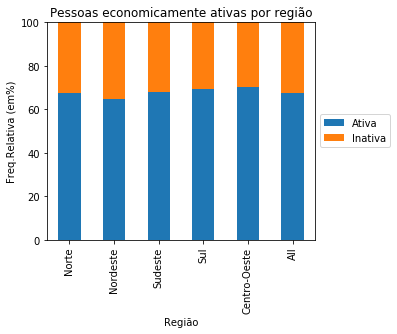

In [69]:
grafico=pd.crosstab(dados.Região,dados.Economicamente,margins=True,rownames=['Região'], colnames=['Economicamente'], normalize='index')*100
plot = grafico.plot(kind='bar', stacked=True,title='Pessoas economicamente ativas por região');
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

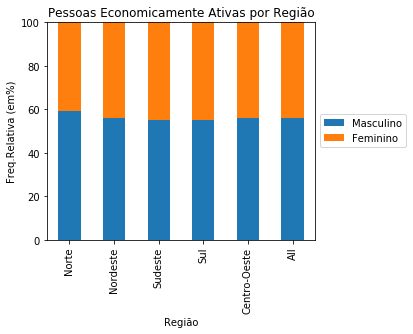

In [60]:
grafico=pd.crosstab(dados.Região,dados.Sexo[(dados.Economicamente=='Ativa')],margins=True,rownames=['Região'], colnames=['Sexo'], normalize='index')*100
plot = grafico.plot(kind='bar', stacked=True,title='Pessoas Economicamente Ativas por Região');
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

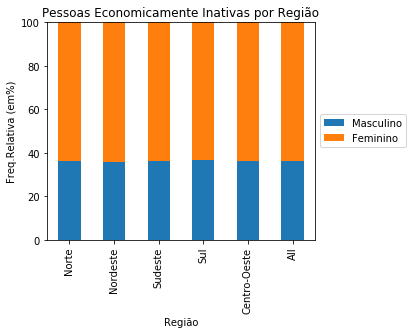

In [39]:
grafico=pd.crosstab(dados.Região,dados.Sexo[(dados.Economicamente=='Inativa')],margins=True,rownames=['Região'], colnames=['Sexo'], normalize='index')*100
plot = grafico.plot(kind='bar', stacked=True,title='Pessoas Economicamente Inativas por Região');
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

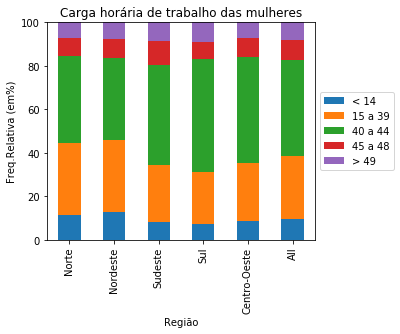

In [61]:
grafico=pd.crosstab(dados.Região[(dados.Economicamente=='Ativa')&(dados.Sexo=='Feminino')],dados['CH de trabalho (h)'],margins=True,rownames=['Região'], colnames=['CH de Trabalho (h)'], normalize='index')*100
plot = grafico.plot(kind='bar', stacked=True,title='Carga horária de trabalho das mulheres');
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

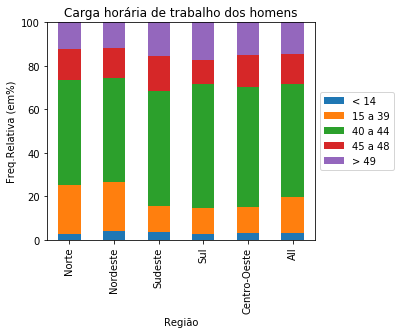

In [62]:
grafico=pd.crosstab(dados.Região[(dados.Economicamente=='Ativa')&(dados.Sexo=='Masculino')],dados['CH de trabalho (h)'],margins=True,rownames=['Região'], colnames=['CH de Trabalho (h)'], normalize='index')*100
plot = grafico.plot(kind='bar', stacked=True,title='Carga horária de trabalho dos homens');
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [71]:
grafico=pd.crosstab(dados.Região[(dados.Economicamente=='Ativa')&(dados.Sexo=='Masculino')],dados['CH de trabalho (h)'],margins=True,rownames=['Região'], colnames=['CH de Trabalho (h)'], normalize='index')*100
grafico

,Idade,Sexo,Economicamente,CH de trabalho (h),Região,Rend. trabalho(R$)
0,23,Masculino,Ativa,40 a 44,Norte,8.000000e+02
1,23,Feminino,Ativa,40 a 44,Norte,1.150000e+03
2,35,Feminino,Ativa,40 a 44,Norte,8.800000e+02
3,34,Masculino,Ativa,> 49,Norte,3.000000e+03
7,18,Feminino,Ativa,40 a 44,Norte,8.800000e+02
8,46,Masculino,Ativa,> 49,Norte,3.500000e+03
9,81,Feminino,Inativa,NaN,Norte,NaN
10,71,Feminino,Inativa,NaN,Norte,NaN
11,47,Feminino,Ativa,40 a 44,Norte,1.500000e+02
12,24,Masculino,Ativa,NaN,Norte,NaN


___
## Conclusão 

Descreva aqui suas conclusões!